# **Logistic Regression**

In this checkpoint, we are going to work  on the heart disease dataset , this time we will use logistic regression to predict if a patient will have TenyearsCHD

1. Apply logistic regression.

2. Use a confusion matrix to validate your model.

3. Another validation matrix for classification is ROC / AUC. Do your research on them, explain them, and apply them in our case.

**By**: LOUBAR Ahcene

# **Pre-step**: Imports

In [22]:
#pre-processing imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

#logistic regression imports
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


# **I - Exploratory Data Analysis**: Data cleaning and visualisation

In [23]:
data = pd.read_csv("/content/logistic_regression_dataset.csv")
data.head(10)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1.0
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0.0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0.0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1.0
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0.0
5,5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1.0
6,6,61,1.0,M,NO,0.0,0.0,0,1,0,238.0,232.0,136.0,24.83,75.0,79.0,0.0
7,7,36,4.0,M,YES,35.0,0.0,0,0,0,295.0,102.0,68.0,28.15,60.0,63.0,0.0
8,8,41,2.0,F,YES,20.0,NaN,0,0,0,220.0,126.0,78.0,20.70,86.0,79.0,0.0
9,9,55,2.0,F,NO,0.0,0.0,0,1,0,326.0,144.0,81.0,25.71,85.0,NaN,0.0


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   sex              4238 non-null   object 
 4   is_smoking       4238 non-null   object 
 5   cigsPerDay       4209 non-null   float64
 6   BPMeds           4185 non-null   float64
 7   prevalentStroke  4238 non-null   int64  
 8   prevalentHyp     4238 non-null   int64  
 9   diabetes         4238 non-null   int64  
 10  totChol          4188 non-null   float64
 11  sysBP            4238 non-null   float64
 12  diaBP            4238 non-null   float64
 13  BMI              4219 non-null   float64
 14  heartRate        4237 non-null   float64
 15  glucose          3850 non-null   float64
 16  TenYearCHD       3390 non-null   float64
dtypes: float64(10)

A first thing we notice is that some features have missing values and one of them is the target (labels).
We can also see that we have two feature that have an object type.

In [25]:
data.isna().sum()

id                   0
age                  0
education          105
sex                  0
is_smoking           0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD         848
dtype: int64

848 data are missing a label. Let's see how much purcentage this amount representes for our data:

In [26]:
(848/data.shape[0])*100

20.009438414346388

20% of our data have missing labels this means that 20% of our data can't be used to train or evaluate our model and therefore we are going to drop the all of these rows.



In [27]:
data.dropna(subset="TenYearCHD",inplace=True)

In [28]:
data.drop(columns=["id", "education"], inplace=True)

In [29]:
count=0
for i in data.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Total number of rows with missing values is ', count)
print('the missing values represent a purcentage of: ', str(round((count/data.shape[0])*100))+"%")

Total number of rows with missing values is  386
the missing values represent a purcentage of:  11%


we still have some feaures that have missing values, and the best thing we can do is to use statistical representations of these features to fill the missing values.

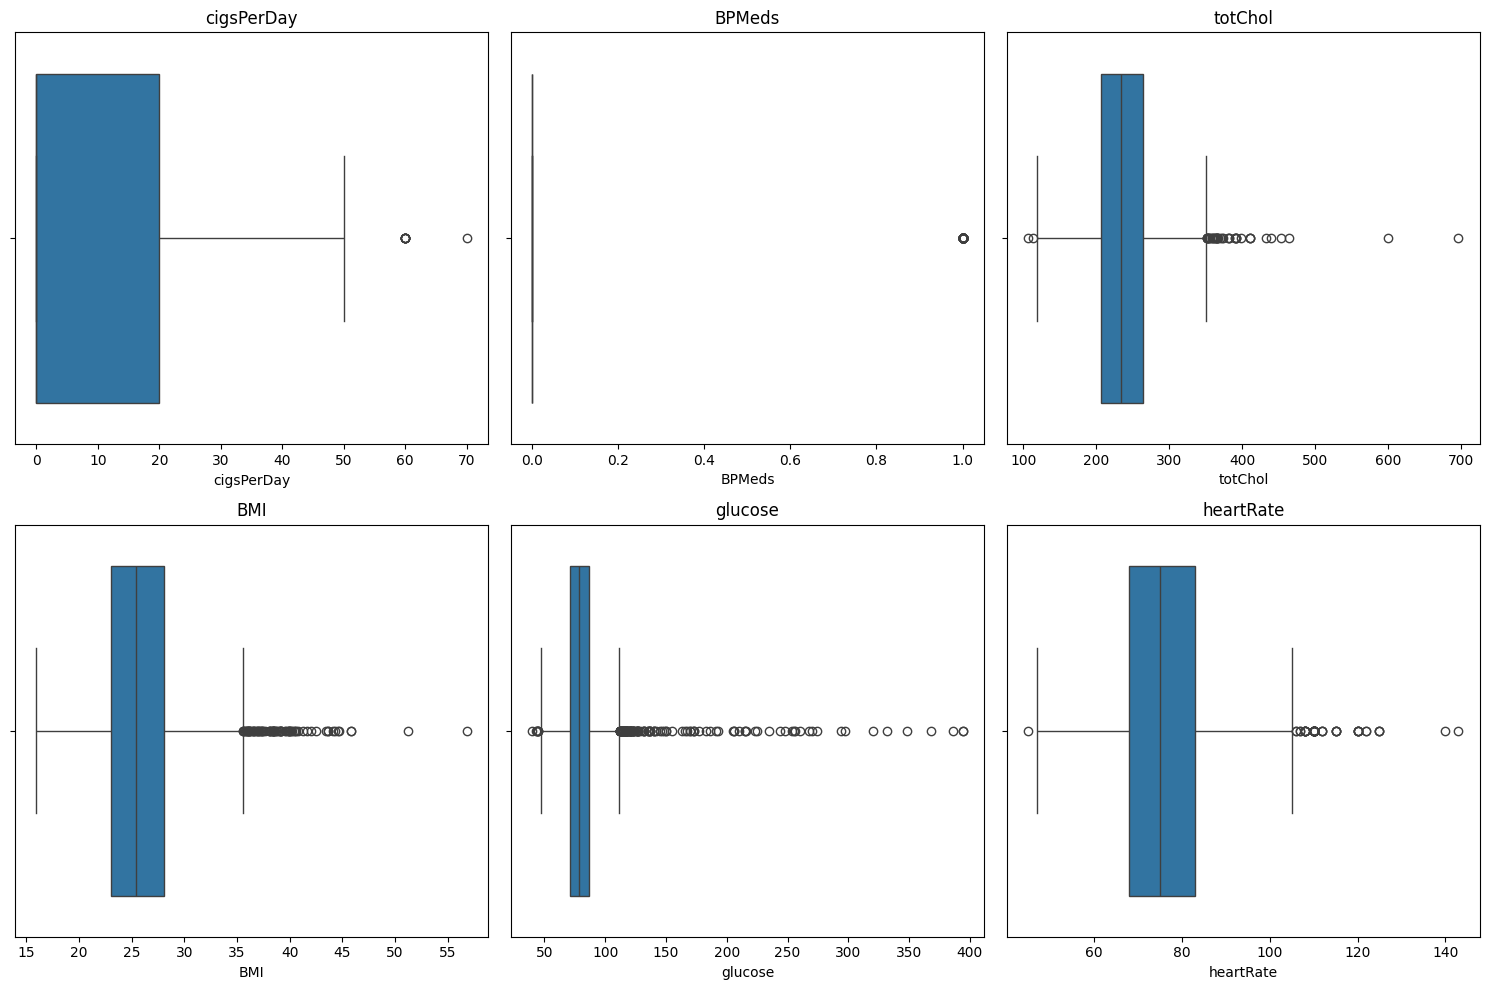

In [30]:
null_values=['cigsPerDay','BPMeds','totChol','BMI','glucose','heartRate']

import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))  # Create a 2x3 grid of subplots

for i, column in enumerate(null_values):
    sns.boxplot(x=data[column], ax=axes[i//3, i%3])  # Place each boxplot in the corresponding subplot
    axes[i//3, i%3].set_title(column)  # Set title for each subplot

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [31]:
for i in null_values :
    x= data[i].median()
    data[i].fillna(x, inplace = True)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3390 entries, 0 to 3389
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   sex              3390 non-null   object 
 2   is_smoking       3390 non-null   object 
 3   cigsPerDay       3390 non-null   float64
 4   BPMeds           3390 non-null   float64
 5   prevalentStroke  3390 non-null   int64  
 6   prevalentHyp     3390 non-null   int64  
 7   diabetes         3390 non-null   int64  
 8   totChol          3390 non-null   float64
 9   sysBP            3390 non-null   float64
 10  diaBP            3390 non-null   float64
 11  BMI              3390 non-null   float64
 12  heartRate        3390 non-null   float64
 13  glucose          3390 non-null   float64
 14  TenYearCHD       3390 non-null   float64
dtypes: float64(9), int64(4), object(2)
memory usage: 423.8+ KB


In [33]:
data.head(10)

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1.0
1,36,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0.0
2,46,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0.0
3,50,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1.0
4,64,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0.0
5,61,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1.0
6,61,M,NO,0.0,0.0,0,1,0,238.0,232.0,136.0,24.83,75.0,79.0,0.0
7,36,M,YES,35.0,0.0,0,0,0,295.0,102.0,68.0,28.15,60.0,63.0,0.0
8,41,F,YES,20.0,0.0,0,0,0,220.0,126.0,78.0,20.70,86.0,79.0,0.0
9,55,F,NO,0.0,0.0,0,1,0,326.0,144.0,81.0,25.71,85.0,78.0,0.0


# Visualisations

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'cigsPerDay'}>,
        <Axes: title={'center': 'BPMeds'}>,
        <Axes: title={'center': 'prevalentStroke'}>],
       [<Axes: title={'center': 'prevalentHyp'}>,
        <Axes: title={'center': 'diabetes'}>,
        <Axes: title={'center': 'totChol'}>,
        <Axes: title={'center': 'sysBP'}>],
       [<Axes: title={'center': 'diaBP'}>,
        <Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'heartRate'}>,
        <Axes: title={'center': 'glucose'}>],
       [<Axes: title={'center': 'TenYearCHD'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

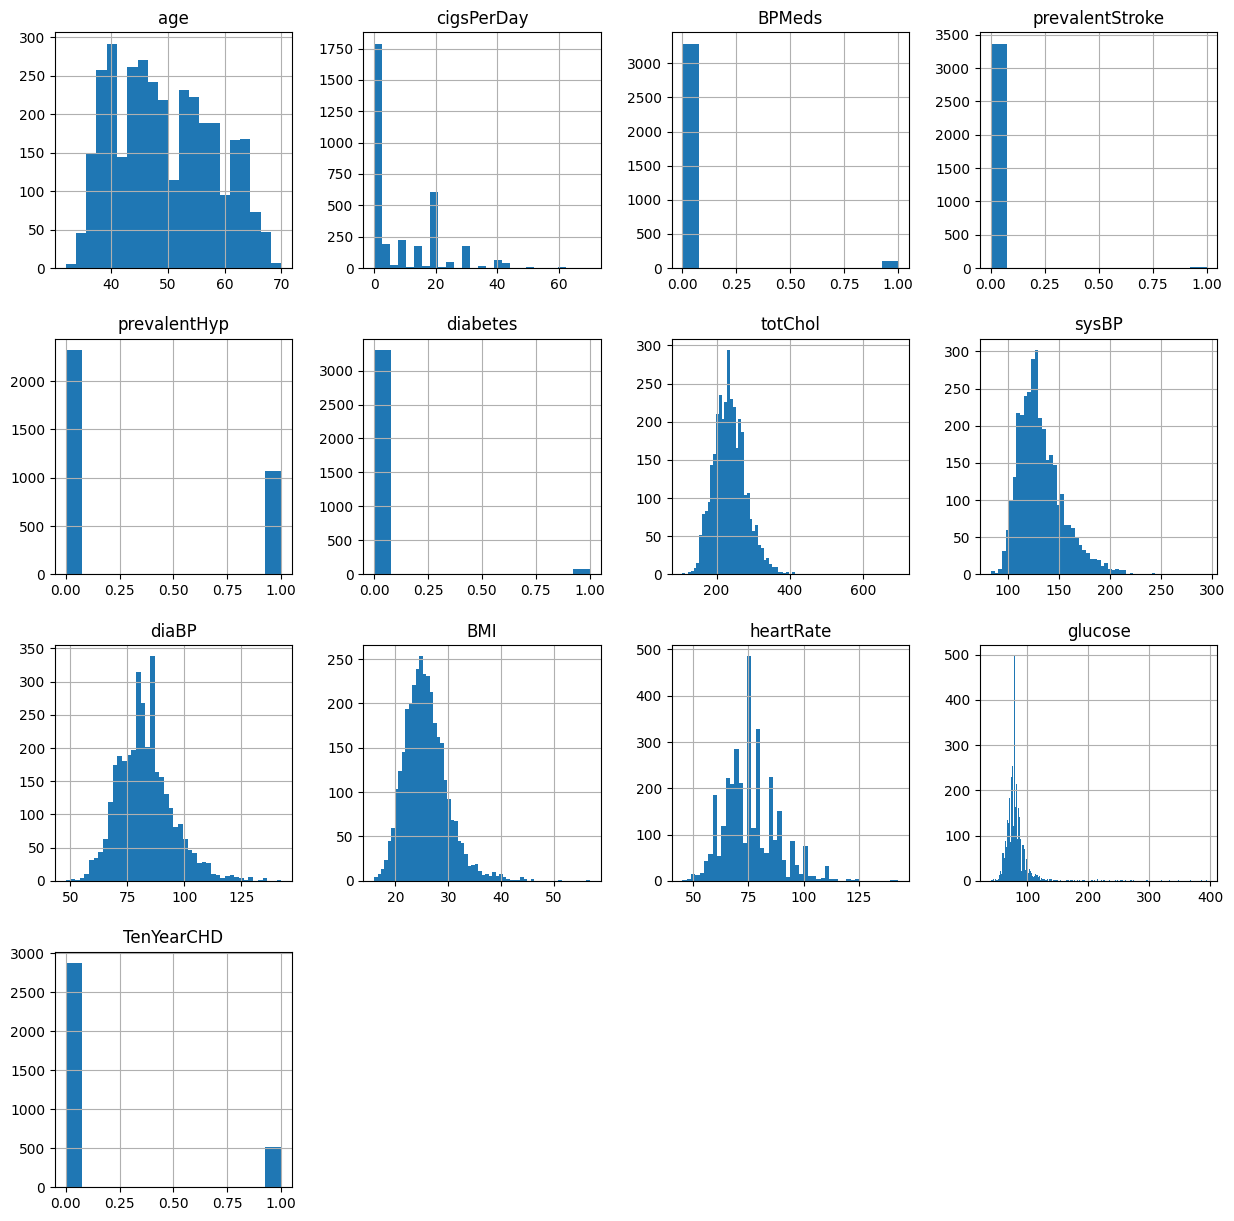

In [34]:
data.hist(bins='auto', figsize=(15,15))

Let's plot the distributions of the target classes to see their distribution:

<Axes: xlabel='TenYearCHD', ylabel='Count'>

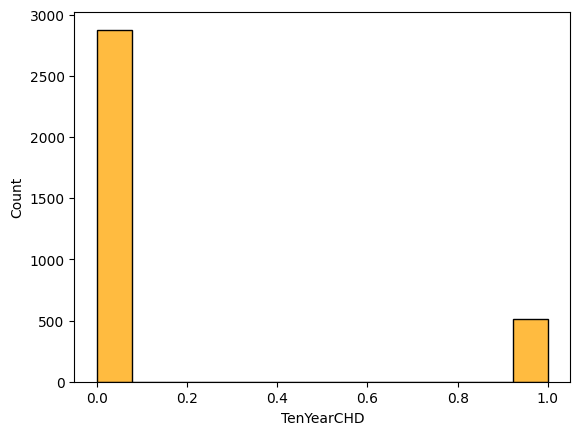

In [35]:
sns.histplot(data["TenYearCHD"], color='orange')

In [36]:
(data[data["TenYearCHD"]==0].shape[0]/data.shape[0])*100

84.92625368731564

Our classes are highly inbalanced as 85% of our data represent people that aren't attained of heart desease

<Axes: xlabel='sex', ylabel='count'>

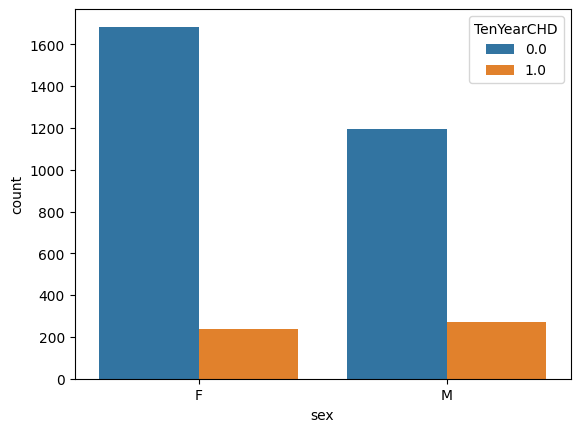

In [37]:
sns.countplot(data=data, x='sex', hue='TenYearCHD')

In [38]:
data[data['TenYearCHD']==1]['sex'].value_counts(normalize = True) * 100

M    53.228963
F    46.771037
Name: sex, dtype: float64

We can see that out of all the patients that have a CHD, 53% of them are male.

<Axes: xlabel='is_smoking', ylabel='count'>

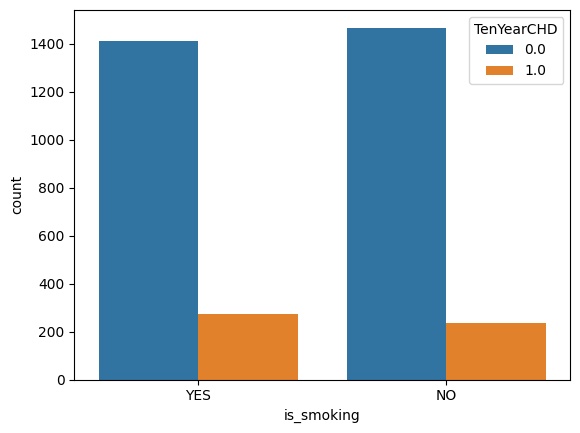

In [39]:
sns.countplot(data=data, x='is_smoking', hue='TenYearCHD')

In [40]:
print("the minimum age is: ", min(data["age"].values))
print("the maximum age is: ", max(data["age"].values))

the minimum age is:  32
the maximum age is:  70


In [41]:
bins = [30, 40, 50, 60, 70]
labels = ['30s', '40s', '50s', '60s']

# Use pd.cut to create the "age_group" column
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels)

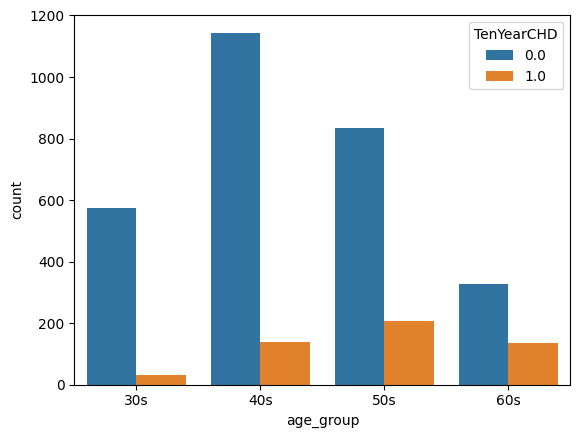

In [42]:
sns.countplot(data=data, x='age_group', hue='TenYearCHD')

data.drop(columns='age_group', inplace=True)

We can see that there seems to be more people in their 50s that are atteined of CHD.

In [43]:
print("the minimum number of cigarettes per day is: ", min(data["cigsPerDay"].values))
print("the maximum number of cigarettes per day is: ", max(data["cigsPerDay"].values))

the minimum number of cigarettes per day is:  0.0
the maximum number of cigarettes per day is:  70.0


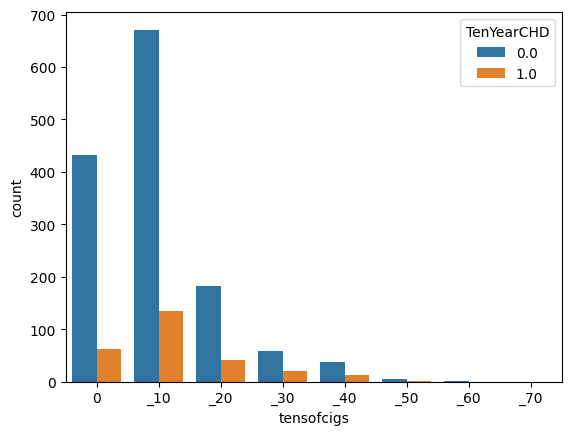

In [44]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ["0", "_10", "_20", "_30", "_40", "_50", "_60", "_70"]

# Use pd.cut to create the "age_group" column
data['tensofcigs'] = pd.cut(data['cigsPerDay'], bins=bins, labels=labels)

sns.countplot(data=data, x='tensofcigs', hue='TenYearCHD')
data.drop(columns='tensofcigs', inplace=True)

In [45]:
data["sex"] = data["sex"].map({"M": 1, "F": 0})
data["is_smoking"] = data["is_smoking"].map({"YES": 1, "NO": 0})

In [46]:
data.head()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1.0
1,36,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0.0
2,46,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0.0
3,50,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1.0
4,64,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0.0


<Axes: xlabel='diabetes', ylabel='count'>

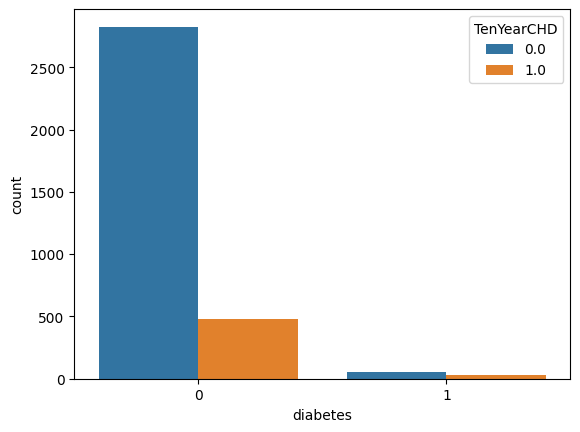

In [47]:
sns.countplot(data=data, x='diabetes', hue='TenYearCHD')

In [48]:
data[data['diabetes']==1]['TenYearCHD'].value_counts(normalize = True) * 100

0.0    62.068966
1.0    37.931034
Name: TenYearCHD, dtype: float64

62% of the patients that are attained of diabetes, don't have CHD => there isn't a strong correlation betwene the two.

**Some observations**:
* The dataset is unbalanced, about 85% variables of the dataset do not have the risk of heart disease.
* Men are more susceptible to have heart disease than women.
* Smokers are more susceptible to having heart desease than non-smokers.
* Older people are more susceptible to heart disease.


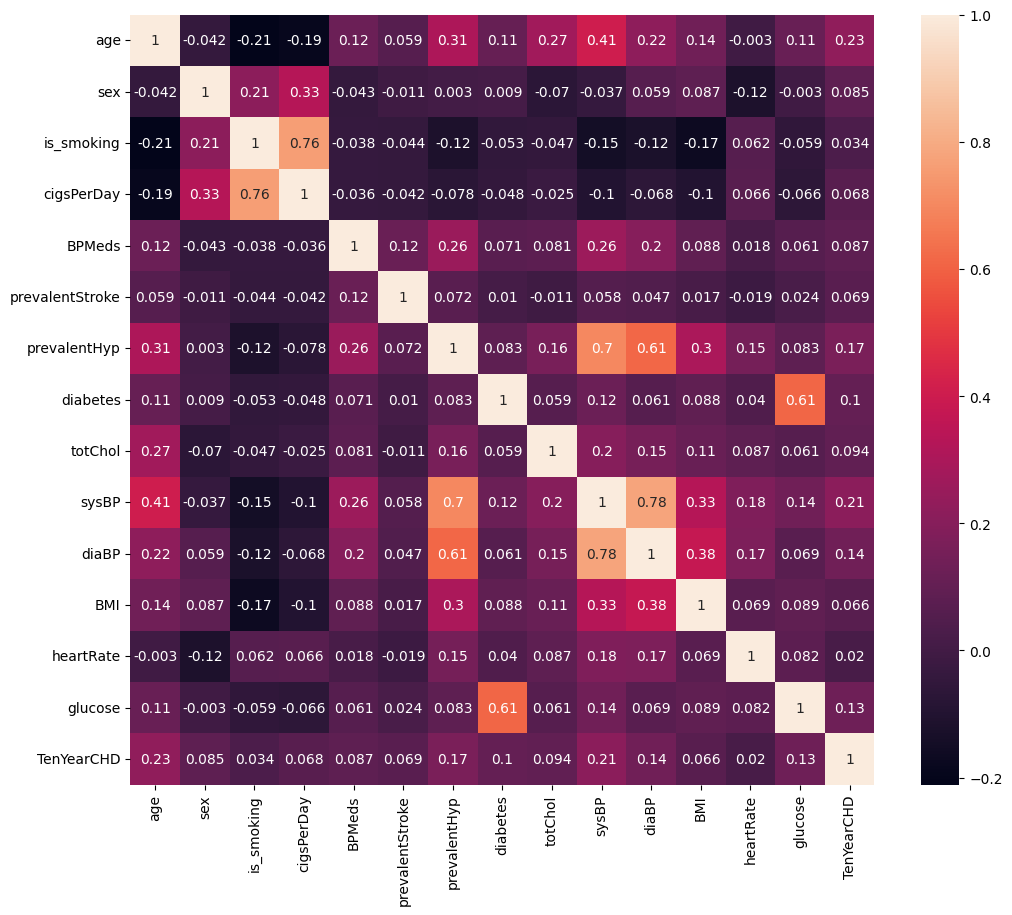

In [49]:
s , ax = plt.subplots( figsize =( 12 , 10 ) )
s = sns.heatmap(data.corr().round(decimals=3), annot=True)

# **II - Training and Validation**: training and evaluating a classification model using logistic regression

In [50]:
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]

In [51]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2712, 14)
(678, 14)
(2712,)
(678,)


In [52]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [53]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [54]:
y_pred = model.predict(x_test)

In [55]:
print("Training Score: :" ,model.score(x_train,y_train))
print("Testing Score : " ,model.score(x_test,y_test))

Training Score: : 0.8573008849557522
Testing Score :  0.8657817109144543


*Interpretation*:

* At first glance, our model seems to have a good accuracy of 86%. We'll
have to use other metrics such as the recall to make sure our model didn't just learn our data by heart and make sure it is able to generalize and perform well on unseen data (test data).



[[578   3]
 [ 88   9]]


<Axes: >

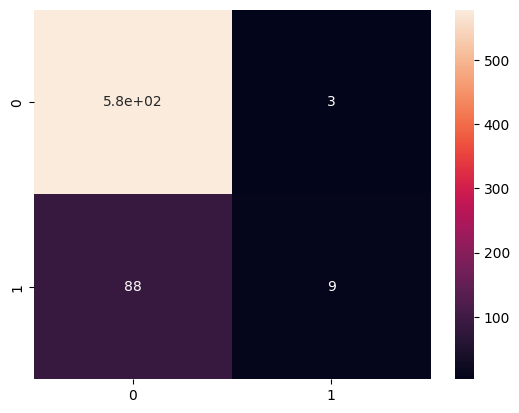

In [56]:
from sklearn.metrics import mean_absolute_error, accuracy_score , precision_score, recall_score, r2_score,confusion_matrix,accuracy_score,classification_report

cm = confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(data=cm,annot = True)

In [57]:
print(f'Accuracy = {metrics.accuracy_score(y_test, y_pred)}')
print(f'Precision = {metrics.precision_score(y_test, y_pred)}')
print(f'Recall = {metrics.recall_score(y_test, y_pred)}')
print(f'R² = {metrics.r2_score(y_test, y_pred)}')

Accuracy = 0.8657817109144543
Precision = 0.75
Recall = 0.09278350515463918
R² = -0.09477083592100377


*Interpretation*:
* We can clearly see that the recall is at 9.27%, which is a clear indicator that our model isn't able classify people that have CHD (positive) accurately, and that is probably due to the classes inbalance we noticed earlier in the data visualisation step.



**What is an ROC curve?**

The **ROC** curve serves as a visual representation and validation tool for our model, employing the confusion matrix and two key metrics: the False Positive Rate (FPR) and True Positive Rate (TPR).

To construct the ROC curve, we utilize the correct labels of the test set and the predicted label probabilities. Each iteration involves setting a threshold within the range of 0 to 1. A confusion matrix is generated for each iteration by comparing the true label values with the probability values based on the current threshold. By completing this process, we can compute the TPR (Y-axis) and FPR (X-axis) for each threshold value. The iterations continue until the threshold reaches 1.

Upon completion of the loop, we obtain arrays containing FPR and TPR values, enabling us to proceed with plotting the ROC curve.

**What does the AUC represent?**

ROC AUC score is a single number that summarizes the classifier's performance across all possible classification thresholds. To get the score, you must measure the area under the ROC curve.

This value is the probability that the model ranks a random positive (1 label) instance more highly than a random negative (0 label) instance.

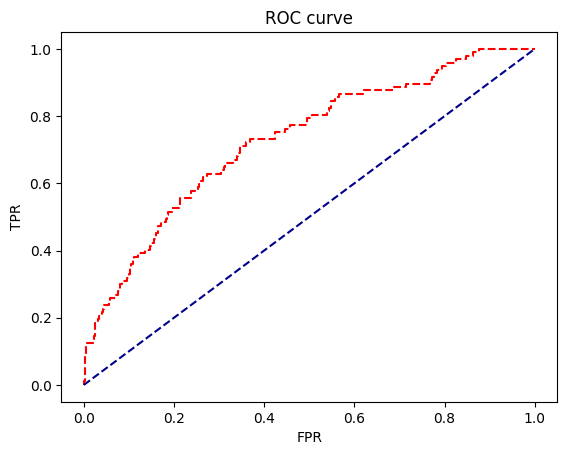

In [58]:
fpr, tpr, threshold = metrics.roc_curve(y_test, model.predict_proba(x_test)[:,1])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve")
plt.plot(fpr, tpr, linestyle= '--', color = "red")
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')

In [59]:
auc = metrics.roc_auc_score(y_test, model.predict_proba(x_test)[:,1])
print(f'The AUC score = {auc}')

The AUC score = 0.7284454459960609


***Conclusion***: one thing we can do to make a better model is to make sure our data classes are balanced, and there are a few ways to do that, one of them is to do an upsampling to the minority class of our data.